## About Dataset

This dataset __Loan_train.csv__ is about past loans. It includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


How can we use this information to predict future defaulters ?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
loan= pd.read_csv('loan_train.csv')
loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
loan.shape #check for the dimension of the dataframe

(346, 10)

In [4]:
loan.isna().sum() #check for missing values

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [5]:
loan.dtypes #check the datatypes of each column

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

## Preprocessing 

In [6]:
#drop the first two columns
loan.drop(columns=["Unnamed: 0","Unnamed: 0.1"], inplace=True)

In [7]:
#Make the column label uniform (Lowercase)
loan.columns = map(str.lower, loan.columns)

In [8]:
#convert the date columns into a datetime object 
loan['due_date'] = pd.to_datetime(loan['due_date'])
loan['effective_date'] = pd.to_datetime(loan['effective_date'])
loan.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Exploratory Data Analysis

Check how many class in the dataset

In [9]:
loan['loan_status'].value_counts()   #count the number of each category in the loan_status

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection

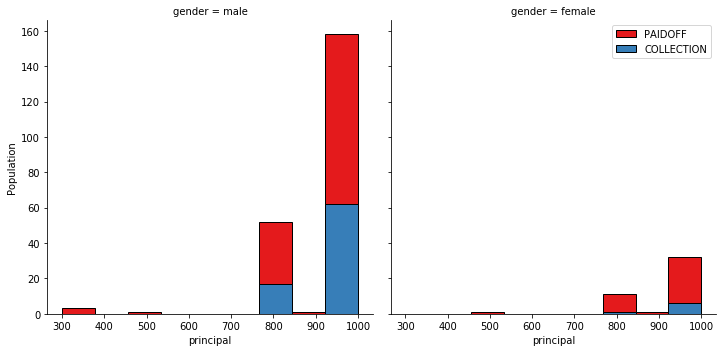

In [10]:
bins = np.linspace(loan.principal.min(), loan.principal.max(), 10)
g = sns.FacetGrid(loan, col="gender", hue="loan_status", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'principal', bins=bins, ec="k" )

g.axes[-1].legend()
g.axes[0].set_ylabel('Population')

plt.show()

People tend to pay off their loans. However, those with lower pincipal amounts pays better

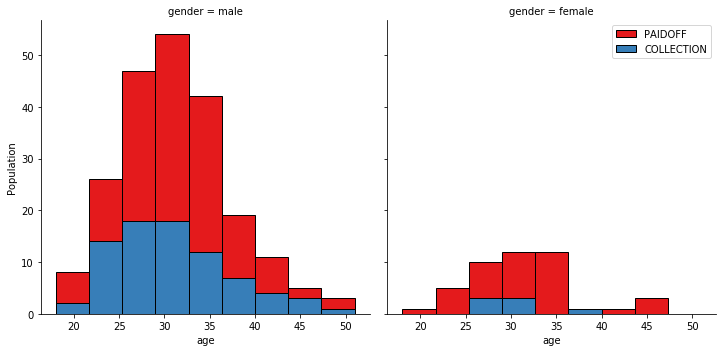

In [11]:
bins = np.linspace(loan.age.min(), loan.age.max(), 10)
g = sns.FacetGrid(loan, col="gender", hue="loan_status", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
g.axes[0].set_ylabel('Population')
plt.show()

### Lets look at the day of the week people get the loan

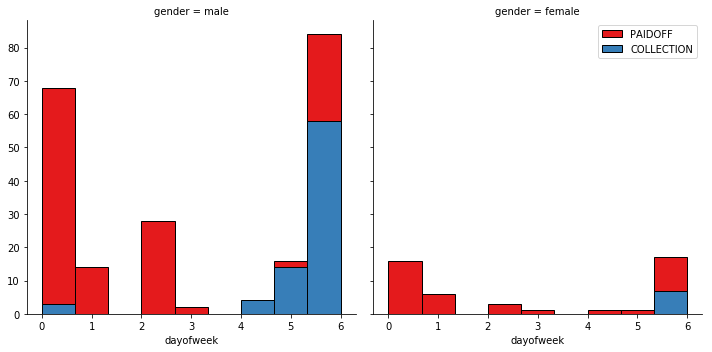

In [12]:
loan['dayofweek'] = loan['effective_date'].dt.dayofweek
bins = np.linspace(loan.dayofweek.min(), loan.dayofweek.max(), 10)
g = sns.FacetGrid(loan, col="gender", hue="loan_status", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Result shows that people who tend to collect loan during weekends tends not to pay off. We will set a threshold values less than day 4

In [13]:
loan['weekend'] = loan['dayofweek'].apply(lambda x: 0 if x < 4 else 1) # add a weekend column 

loan.head() 

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [14]:
loan.groupby(by=['gender'])['loan_status'].value_counts(normalize= True)

gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% of the female collectors paid off their loans compared to 73% of their counterparts 

In [15]:
loan.groupby(by=['education'])['loan_status'].value_counts(normalize= True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

There is no significant difference among the categories of education except people with Masters degree and above.
The above results shows that people with Master degree or Above have equal chances of defaulting and payment(0.5).
It won't be a bad idea to drop the rows with education of 'Master or Higher'

## Feature Selection

First: Let's create a model without dropping the 'Master or Higher' education category

## Method 1

In [16]:
X = loan.loc[:, ['principal','terms','age','education','gender','weekend']]
y = loan.loc[:,'loan_status']

In [17]:
print(X.shape)
print(y.shape)

(346, 6)
(346,)


In [18]:
y.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.25, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)

(259, 6)
(259,)


## Check for categorical column

In [23]:
categorical_col = [col for col in X_train.columns if X_train[col].dtypes == 'object']
numerical_col = list( set(X_train.columns)- set(categorical_col))

print(categorical_col)
print(numerical_col)

['education', 'gender']
['weekend', 'age', 'principal', 'terms']


In [24]:
#Convert the categorical columns to dummy variables 
ohe = OneHotEncoder()
feature_scaling = StandardScaler()
clf = SVC()


In [25]:
column_tranformer = make_column_transformer((feature_scaling, numerical_col), 
                                            (ohe,categorical_col),
                                            remainder = 'passthrough')

In [26]:
    
pipe = make_pipeline(column_tranformer, clf)

In [27]:
pipe.fit(X_train,y_train)

C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['weekend', 'age', 'principal', 'terms']), ('onehotencoder...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [28]:
y_pred = pipe.predict(X_test)

C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
confusion_matrix(y_pred, y_test)

array([[ 1,  9],
       [17, 60]], dtype=int64)

In [31]:
accuracy_score(y_pred, y_test)

0.7011494252873564

## Apply the random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [34]:
column_tranformer = make_column_transformer((ohe,categorical_col),
                                            remainder = 'passthrough')

    
pipe = make_pipeline(column_tranformer, rfc)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
confusion_matrix(y_pred, y_test)
accuracy_score(y_pred, y_test)

0.7701149425287356

## Method 2 :

In [36]:
loan.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [49]:
loan = loan[loan.education != 'Master or Above']

In [50]:
loan.shape

(344, 10)

In [53]:
X = loan.loc[:, ['principal','terms','age','education','gender','weekend']]
y = loan.loc[:,'loan_status']

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.25, random_state=42)

#Convert the categorical columns to dummy variables 
ohe = OneHotEncoder()
feature_scaling = StandardScaler()
clf = SVC()


column_tranformer = make_column_transformer((feature_scaling, numerical_col), 
                                            (ohe,categorical_col),
                                            remainder = 'passthrough')
    
pipe2 = make_pipeline(column_tranformer, clf)

pipe2.fit(X_train,y_train)
y_pred = pipe2.predict(X_test)

print(confusion_matrix(y_pred, y_test))

accuracy_score(y_pred, y_test)

[[ 0  0]
 [19 67]]


C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


0.7790697674418605

In [55]:
from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression()


X = loan.loc[:, ['principal','terms','age','education','gender','weekend']]
y = loan.loc[:,'loan_status']

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.25, random_state=42)

#Convert the categorical columns to dummy variables 
ohe = OneHotEncoder()
feature_scaling = StandardScaler()



column_tranformer = make_column_transformer((feature_scaling, numerical_col), 
                                            (ohe,categorical_col),
                                            remainder = 'passthrough')
    
pipe3 = make_pipeline(column_tranformer, logreg)

pipe3.fit(X_train,y_train)
y_pred = pipe3.predict(X_test)

print(confusion_matrix(y_pred, y_test))

accuracy_score(y_pred, y_test)

C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 3  7]
 [16 60]]


C:\Users\olatu\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


0.7325581395348837